# Поиск истины в вине

<img src="https://i.pinimg.com/originals/35/fd/2f/35fd2fdccb58c2250241113f12b55d14.jpg" width="300">


**Предобработка данных**

	- Загрузите данные в Pandas DataFrame.
	- Посчитайте размерность данных (количество строк и стоблцов).
	- Посчитайте количество пропущенных значений в каждой переменной.
	- Выведите тип данных каждой переменной. Переконвертируйте при необходимости.
    - Вина какой области (`province`) получают наилучшие рейтинги? 
	- На основе словаря `color` оздайте переменную, в которой закодирован цвет вина (например, при помощи метода [`map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) или другого).
    - Удалите наблюдения для которых цвет (`color`) не указан.
	- Визуализируйте распределения числовых переменных.
	- Для каждой страны рассчитайте долю каждого вида вина. В какой стране доля белого вина наибольшая, а в какой красного? (Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного.
	


**Указывайте в коде, какой пункт начали выполнять.**

In [19]:
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "red",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузите данные в Pandas DataFrame.

In [21]:
df = pd.read_csv('../data/wine_reviews.csv')
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...,...,...,...
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata
19998,Italy,Organically farmed Cannonau grapes deliver sma...,Le Sabbie,87,NaN,Sicily & Sardinia,Cannonau di Sardegna,NaN,Cannonau,Meloni


### Посчитайте размерность данных (количество строк и стоблцов).

1 способ

In [22]:
df.shape

(20000, 10)

2 способ

In [23]:
len(df) # способ подсчета строк

20000

In [24]:
len(df.count(axis='rows')) # способ подсчета колонок

10

3 способ

In [25]:
df.info() # кол-во индексов указывает на кол-во строк, Data columns (total 10 columns) укажет на кол-во столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


Количество строк 20000, количество столбцов 10. Из представленной информации видно, что есть пропуски в данных.

### Посчитайте количество пропущенных значений в каждой переменной.

1 способ

In [26]:
df.isnull().sum()

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64

2 способ

Text(0.5, -0.2, 'Рисунок 1. - Матрица пропущенных значений набора данных')

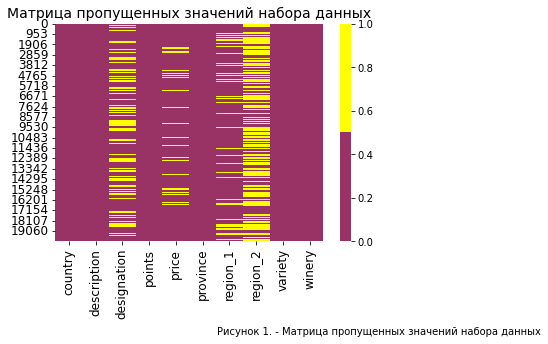

In [27]:
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.2, "Рисунок 1. - Матрица пропущенных значений набора данных")

3 спсосб

In [28]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['Пропущенные значения', 'Процент'])
MissingData

,Пропущенные значения,Процент
region_2,11942,59.710
designation,6001,30.005
region_1,3457,17.285
price,1802,9.010
country,0,0.000
description,0,0.000
points,0,0.000
province,0,0.000
variety,0,0.000
winery,0,0.000


6 пропущенных значений

**Посмотрим также в процентном соотношении**

In [29]:
round(df.isna().sum()/len(df)*100, 2)

country         0.00
description     0.00
designation    30.00
points          0.00
price           9.01
province        0.00
region_1       17.28
region_2       59.71
variety         0.00
winery          0.00
dtype: float64

Наибольшее количество пропусков в колонках region_2 (почти 60%), потом идет колонка designation (30%), и колонки region_1 (17%) и price (9%)

### Выведите тип данных каждой переменной. Переконвертируйте при необходимости.

In [30]:
df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [31]:
## df[['points']].astype('int')  Переконвертировать можно так, но вданном случае нам это не требуется

Из представленной информации видно, что баллы и цена являются числовыми значениями, а остальные данные категориальные.

### Вина какой области (`province`) получают наилучшие рейтинги? 

1 способ

In [33]:
df_points=df.sort_values(by='points', ascending=False)
df_points

,country,description,designation,points,price,province,region_1,region_2,variety,winery
323,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
17967,US,Impossibly aromatic. Hard to imagine greater c...,Red Wine,100,245.0,California,Rutherford,Napa,Cabernet Blend,Sloan
5955,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
7306,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse
19826,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse
...,...,...,...,...,...,...,...,...,...,...
12050,Spain,"This starts with aromas of cinnamon, hard cand...",Circles Syrah & Garnacha,80,10.0,Northern Spain,Cariñena,NaN,Syrah-Grenache,Bodegas Virgen del Águila
13249,Argentina,"Weird, green, spicy and odd smelling, with har...",Martin Fierro,80,10.0,Other,Tulum Valley,NaN,Cabernet Sauvignon,Bodegas Borbore
15454,US,"Acidity pokes through the creamy mouth, giving...",James River White,80,8.0,Virginia,Virginia,NaN,White Blend,The Williamsburg Winery
6715,France,"Lean and rather dry, this has old wood and lea...",Hyppos,80,25.0,Bordeaux,Bordeaux Supérieur,NaN,Bordeaux-style Red Blend,Château Majoureau


In [34]:
print('Вина, которые получили оценку 100:')
df[df['points']==100]['province']

Вина, которые получили оценку 100:


323       Champagne
5955        Tuscany
17967    California
Name: province, dtype: object

 2 способ

In [35]:
df.nlargest(5, 'points')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
323,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
5955,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
17967,US,Impossibly aromatic. Hard to imagine greater c...,Red Wine,100,245.0,California,Rutherford,Napa,Cabernet Blend,Sloan
5195,France,98-100 Barrel sample. The aromas are so rich a...,Barrel sample,99,NaN,Bordeaux,Sauternes,NaN,Bordeaux-style White Blend,Château d'Yquem
7306,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse


4 способ

In [36]:
df.groupby('province')['points'].max().sort_values(ascending=False)[:10]

province
Champagne         100
Tuscany           100
California        100
Piedmont           99
Oregon             99
Douro              99
Bordeaux           99
Victoria           98
Burgundy           98
Northern Spain     97
Name: points, dtype: int64

### На основе словаря `color` оздайте переменную, в которой закодирован цвет вина

1 способ

Переведем данные из словаря color в табличный вид

In [16]:
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "red",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}
color2 = pd.DataFrame.from_dict(color, orient = 'index', columns = ['color'])
color2.index.names = ['variety']

In [17]:
display(color2)

,color
variety,
Chardonnay,white
Pinot Noir,red
Cabernet Sauvignon,red
Red Blend,red
Bordeaux-style Red Blend,red
Sauvignon Blanc,white
Syrah,red
Riesling,red
Merlot,red


Добавим в основную таблицу данные о цвете вина 

In [18]:
df.merge(color2, how = 'left', on = 'variety')

,country,description,designation,points,price,province,region_1,region_2,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek,red
...,...,...,...,...,...,...,...,...,...,...,...
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie,NaN
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine,red
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata,NaN
19998,Italy,Organically farmed Cannonau grapes deliver sma...,Le Sabbie,87,NaN,Sicily & Sardinia,Cannonau di Sardegna,NaN,Cannonau,Meloni,NaN


2 способ

In [19]:
df['color'] = df['variety'].map(color)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek,red
...,...,...,...,...,...,...,...,...,...,...,...
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie,NaN
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine,red
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata,NaN
19998,Italy,Organically farmed Cannonau grapes deliver sma...,Le Sabbie,87,NaN,Sicily & Sardinia,Cannonau di Sardegna,NaN,Cannonau,Meloni,NaN


### Удалите наблюдения для которых цвет (`color`) не указан.


1 способ

In [20]:
df_color = pd.merge(df, color2, on='variety')
df_color

,country,description,designation,points,price,province,region_1,region_2,variety,winery,color_x,color_y
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,red,red
1,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek,red,red
2,US,Marc Piro broke away from his day job at Au Bo...,Presqu'ile Vineyard,93,44.0,California,Santa Maria Valley,Central Coast,Pinot Noir,Piro,red,red
3,US,"Soft upon entry, this is a lush and plummy win...",Nysa Vineyard,91,55.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Torii Mor,red,red
4,US,This selection (above reserve) from the estate...,Areté,85,60.0,Oregon,Oregon,Oregon Other,Pinot Noir,Iris Vineyards,red,red
...,...,...,...,...,...,...,...,...,...,...,...,...
16494,Chile,"Rough and sulfuric at first, and then quite re...",Winemaker's Selection,82,14.0,Aconcagua Valley,NaN,NaN,Carmenère,In Situ,red,red
16495,Chile,"Aromas of cola, blackberry, cherry and mild he...",Single Vineyard Plot: Malva,87,15.0,Peumo,NaN,NaN,Carmenère,Anakena,red,red
16496,Chile,Sweet basic cherry aromas are candied at first...,Reserva,86,14.0,Colchagua Valley,NaN,NaN,Carmenère,Viu Manent,red,red
16497,Chile,"Very nicely made, with good balance. The nose ...",NaN,87,15.0,Colchagua Valley,NaN,NaN,Carmenère,Arboleda,red,red


2 способ

Узнаем количество строк, нет данных о цвете вина

In [21]:
df['color'].isna().sum()

3501

Заменим в строках по цвету пропущенные значения на 0

In [22]:
df['color'] = df['color'].fillna(0)
print(len(df))

20000


In [23]:
df['color'].isna().sum()

0

Удалим строки с пропусками по цвету 

In [24]:
df_color = df[df['color'] != 0]

In [25]:
print(len(df_color))

16499


проверим, остолись ли нулевые строки в столбце color

In [26]:
df_color['color'].value_counts()

red      11588
white     4037
other      874
Name: color, dtype: int64


### Визуализируйте распределения числовых переменных.


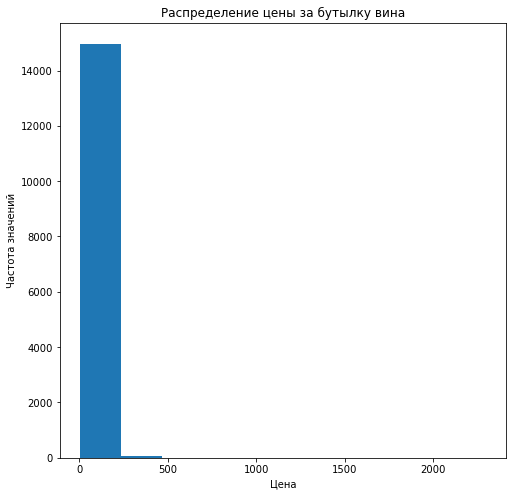

In [27]:
df_color['price'].plot(kind='hist',figsize=(8, 8))
plt.title('Распределение цены за бутылку вина')
plt.ylabel('Частота значений')
plt.xlabel('Цена')
plt.show()

Данный график показывает, что основное распрелеление цен лежит примерно от 0 до 250.

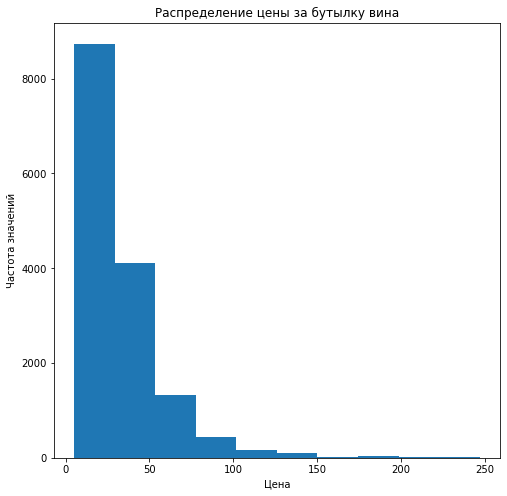

In [28]:
df_color.query('price<250')['price'].plot(kind='hist', figsize=(8, 8))
plt.title('Распределение цены за бутылку вина')
plt.ylabel('Частота значений')
plt.xlabel('Цена')
plt.show()

Также следует посмотреть выбросы

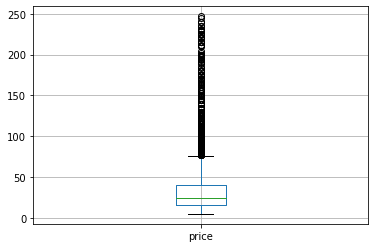

In [29]:
df_color.query('price<250').boxplot('price') 
plt.show()

Из данных видно, что выбросы начинаюся с 75.

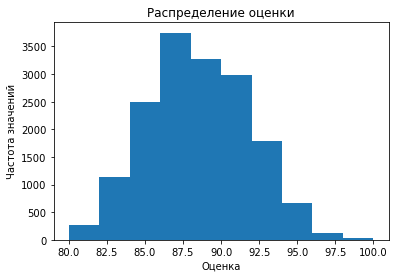

In [30]:
df_color['points'].plot(kind='hist')  
plt.title('Распределение оценки')
plt.ylabel('Частота значений')
plt.xlabel('Оценка')
plt.show()

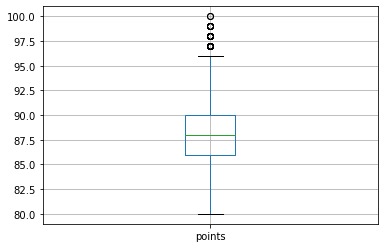

In [31]:
df_color.boxplot('points')
plt.show()

Из данных графиков видно, что распределение является нормальным.Наибольшее колчество оценок лежит в промежутке от 85,5 до 90. Оценки свыше 96 являются выбросами.

### Для каждой страны рассчитайте долю каждого вида вина. В какой стране доля белого вина наибольшая, а в какой красного? (Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного.

1 способ

In [32]:
df_pivot=df_color.pivot_table(index='country', columns='color',values='province', aggfunc='count')

In [33]:
df_pivot.fillna(0, inplace=True)

In [34]:
df_pivot['total'] = df_pivot['other']+df_pivot['red']+df_pivot['white']

In [35]:
df_pivot['red']=round(df_pivot['red']/df_pivot['total']*100, 0)

In [36]:
df_pivot['other']=round(df_pivot['other']/df_pivot['total']*100, 0)

In [37]:
df_pivot['white']=round(df_pivot['white']/df_pivot['total']*100, 0)

In [38]:
df_pivot=df_pivot.drop('total', axis=1)

In [39]:
df_pivot

color,other,red,white
country,,,
Argentina,2.0,84.0,14.0
Australia,3.0,71.0,27.0
Austria,2.0,35.0,63.0
Brazil,100.0,0.0,0.0
Bulgaria,0.0,67.0,33.0
Canada,0.0,86.0,14.0
Chile,2.0,70.0,28.0
China,0.0,0.0,100.0
Croatia,14.0,29.0,57.0


In [40]:
df_pivot.sort_values(by='red', ascending=False).head()

color,other,red,white
country,,,
Turkey,0.0,100.0,0.0
Switzerland,0.0,100.0,0.0
Luxembourg,0.0,100.0,0.0
Germany,0.0,98.0,2.0
Romania,0.0,87.0,13.0


In [41]:
df_pivot.sort_values(by='white', ascending=False).head()

color,other,red,white
country,,,
Georgia,0.0,0.0,100.0
China,0.0,0.0,100.0
US-France,0.0,0.0,100.0
Lebanon,0.0,33.0,67.0
Austria,2.0,35.0,63.0


В станах China, Georgia, US-France наибольшая доля белого вина, а в странах Luxembourg, Switzerland, Turkey красного

2 способ

In [42]:
df_pivot2 = pd.crosstab(df_color.country, df_color.color)
df_pivot2

color,other,red,white
country,,,
Argentina,12,528,87
Australia,14,359,135
Austria,6,105,189
Brazil,2,0,0
Bulgaria,0,6,3
Canada,0,18,3
Chile,13,506,201
China,0,0,2
Croatia,1,2,4


In [43]:
df_part=df_pivot2.sum(axis=1)
df_part

country
Argentina        627
Australia        508
Austria          300
Brazil             2
Bulgaria           9
Canada            21
Chile            720
China              2
Croatia            7
Cyprus             6
France          2403
Georgia            2
Germany          331
Greece            51
Hungary           12
Israel            79
Italy           1942
Lebanon            3
Luxembourg         1
Mexico             9
Moldova           12
New Zealand      438
Portugal         634
Romania           15
Slovenia           9
South Africa     246
Spain            606
Switzerland        1
Turkey             6
US              7489
US-France          1
Ukraine            1
Uruguay            6
dtype: int64

In [44]:
df_pivot3=((df_pivot2.div(df_part, axis=0))*100).round(2)
df_pivot3

color,other,red,white
country,,,
Argentina,1.91,84.21,13.88
Australia,2.76,70.67,26.57
Austria,2.00,35.00,63.00
Brazil,100.00,0.00,0.00
Bulgaria,0.00,66.67,33.33
Canada,0.00,85.71,14.29
Chile,1.81,70.28,27.92
China,0.00,0.00,100.00
Croatia,14.29,28.57,57.14


In [45]:
df_pivot3.sort_values(by='red', ascending=False).head()

color,other,red,white
country,,,
Turkey,0.0,100.00,0.00
Switzerland,0.0,100.00,0.00
Luxembourg,0.0,100.00,0.00
Germany,0.3,97.58,2.11
Romania,0.0,86.67,13.33


In [46]:
df_pivot3.sort_values(by='white', ascending=False).head()

color,other,red,white
country,,,
Georgia,0.0,0.00,100.00
US-France,0.0,0.00,100.00
China,0.0,0.00,100.00
Lebanon,0.0,33.33,66.67
Austria,2.0,35.00,63.00


В станах China, Georgia, US-France наибольшая доля белого вина, а в странах Luxembourg, Switzerland, Turkey красного